<a href="https://colab.research.google.com/github/Irving-ZC/Programas-MN/blob/main/Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SEED = 73
np.random.seed(SEED)

## Funciones

In [ ]:
def val_null(df):
    df_null = df.isnull().sum().to_frame().reset_index()
    df_null.columns=['variable','faltantes']
    df_null['porc'] = df_null['faltantes']/df.shape[0]
    df_null.sort_values('porc',ascending=False,inplace=True)
    return df_null

## Datos

Metadatos:


*   **PassengerId**: Id del pasajero
*   **Survived**: Sobreviviente 1:Si, 0:No
*   **Pclass**: Tipo de clase del boleto 1:1ra(alta) , 2:da (media), 3:ra(baja)
*   **Name**: Nombre del pasajero
*   **Sex**: Genero del pasajero (hombre|mujer)
*   **Age**: Edad (años)
*   **SibSp**: Número de hermanos/cónyuges a bordo del Titanic
*   **Parch**: Número de padres/hijos a bordo del Titanic
*   **Ticket**: Id del boleto
*   **Fare**: Costo del boleto
*   **Cabin**: Número de cabina
*   **Embarked**: Puerto de embarcación C:Cherbourg, Q:Queenstown, S:Southampton



In [ ]:
data = pd.read_csv(f'titanic.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Feature Engineering

_**(agregado)**_

In [ ]:
# Extraer el título del nombre de los pasajeros
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
# Agrupar títulos similares
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
data['Title'] = data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Military')
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
# Prefijo del boleto
data['TicketPrefix'] = data['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).fillna('None')

# Features categóricas a variables dummy
data = pd.get_dummies(data, columns=['TicketPrefix', 'Title'], drop_first=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,TicketPrefix_STON,TicketPrefix_SW,TicketPrefix_W,TicketPrefix_WE,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,True,False,False,False,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
data.shape

(891, 36)

In [ ]:
data.columns = [var.lower() for var in data.columns]
df = data.copy()
df.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,ticketprefix_ston,ticketprefix_sw,ticketprefix_w,ticketprefix_we,title_master,title_military,title_miss,title_mr,title_mrs,title_royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,True,False,False,False,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,True,False,False


### Variables no relevantes
Desde un inicio, aquellas variables que son consideradas como NO relavantes pueden ser eliminadas

In [ ]:
df.drop(['passengerid','name','ticket'],axis=1,inplace=True)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,ticketprefix_c,...,ticketprefix_ston,ticketprefix_sw,ticketprefix_w,ticketprefix_we,title_master,title_military,title_miss,title_mr,title_mrs,title_royalty
0,0,3,male,22.0,1,0,7.2500,NaN,S,False,...,False,False,False,False,False,False,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False,...,False,False,False,False,False,False,False,False,True,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False,...,True,False,False,False,False,False,True,False,False,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False,...,False,False,False,False,False,False,False,False,True,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False,...,False,False,False,False,False,False,False,True,False,False


### Clasificación de variables

In [ ]:
num = ['age','sibsp','parch','fare']
cat = ['pclass','sex','cabin','embarked']
y = 'survived'

In [ ]:
df.dtypes

survived                int64
pclass                  int64
sex                    object
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
cabin                  object
embarked               object
ticketprefix_c           bool
ticketprefix_ca          bool
ticketprefix_f           bool
ticketprefix_fa          bool
ticketprefix_line        bool
ticketprefix_none        bool
ticketprefix_p           bool
ticketprefix_pc          bool
ticketprefix_pp          bool
ticketprefix_s           bool
ticketprefix_sc          bool
ticketprefix_sco         bool
ticketprefix_so          bool
ticketprefix_soton       bool
ticketprefix_ston        bool
ticketprefix_sw          bool
ticketprefix_w           bool
ticketprefix_we          bool
title_master             bool
title_military           bool
title_miss               bool
title_mr                 bool
title_mrs                bool
title_royalty            bool
dtype: obj

In [ ]:
df.age.value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

## Análisis Exploratorio (EDA)

1.  * Valores ausentes
    * Resumen estadístico incluyendo métricas como  la media, desviación estándar, percentiles, mínimo y máximo
    * Matriz de correlación
    * PCA: Componentes Principales
    * Discretas:
        * Gráfico de barras
        * Gráfico de barras apiladas
    * Continuas:
        * Histogramas
        * Diagramas de caja
        * Gráfico dispersión y Dispersión 3D







### Análisis de valores ausentes

In [ ]:
val_null(df)

,variable,faltantes,porc
7,cabin,687,0.771044
3,age,177,0.198653
8,embarked,2,0.002245
0,survived,0,0.000000
1,pclass,0,0.000000
4,sibsp,0,0.000000
2,sex,0,0.000000
6,fare,0,0.000000
5,parch,0,0.000000
9,ticketprefix_c,0,0.000000


In [ ]:
df_null = val_null(df)
list_var = df_null[df_null['faltantes']<int(df.shape[0]*0.2)].variable.to_list()
df = df[list_var]

In [ ]:
df.age.mean()

np.float64(29.69911764705882)

In [ ]:
df.groupby('sex')['age'].mean().reset_index()

,sex,age
0,female,27.915709
1,male,30.726645


In [ ]:
df.loc[(df.age.isnull()) & (df['sex']=='female'),'age'] = df.loc[df['sex']=='female','age'].mean()
df.loc[(df.age.isnull()) & (df['sex']=='male'),'age'] = df.loc[df['sex']=='male','age'].mean()

In [ ]:
df.embarked.value_counts().reset_index()

,embarked,count
0,S,644
1,C,168
2,Q,77


In [ ]:
df.embarked.mode()[0]

'S'

In [ ]:
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

In [ ]:
val_null(df)

,variable,faltantes,porc
0,age,0,0.0
1,embarked,0,0.0
2,survived,0,0.0
3,pclass,0,0.0
4,sibsp,0,0.0
5,sex,0,0.0
6,fare,0,0.0
7,parch,0,0.0
8,ticketprefix_c,0,0.0
9,ticketprefix_ca,0,0.0


In [ ]:
df

,age,embarked,survived,pclass,sibsp,sex,fare,parch,ticketprefix_c,ticketprefix_ca,...,ticketprefix_ston,ticketprefix_sw,ticketprefix_w,ticketprefix_we,title_master,title_military,title_miss,title_mr,title_mrs,title_royalty
0,22.000000,S,0,3,1,male,7.2500,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38.000000,C,1,1,1,female,71.2833,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,26.000000,S,1,3,0,female,7.9250,0,False,False,...,True,False,False,False,False,False,True,False,False,False
3,35.000000,S,1,1,1,female,53.1000,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,35.000000,S,0,3,0,male,8.0500,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,S,0,2,0,male,13.0000,0,False,False,...,False,False,False,False,False,True,False,False,False,False
887,19.000000,S,1,1,0,female,30.0000,0,False,False,...,False,False,False,False,False,False,True,False,False,False
888,27.915709,S,0,3,1,female,23.4500,2,False,False,...,False,False,True,False,False,False,True,False,False,False
889,26.000000,C,1,1,0,male,30.0000,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
cat.remove('cabin')

### Resumen estadístico

In [ ]:
df.describe(percentiles=[x/10 for x in range(1,10)])

,age,survived,pclass,sibsp,fare,parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.736034,0.383838,2.308642,0.523008,32.204208,0.381594
std,13.014897,0.486592,0.836071,1.102743,49.693429,0.806057
min,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
10%,16.000000,0.000000,1.000000,0.000000,7.550000,0.000000
20%,20.000000,0.000000,1.000000,0.000000,7.854200,0.000000
30%,24.000000,0.000000,2.000000,0.000000,8.050000,0.000000
40%,27.915709,0.000000,2.000000,0.000000,10.500000,0.000000
50%,30.000000,0.000000,3.000000,0.000000,14.454200,0.000000
60%,30.726645,0.000000,3.000000,0.000000,21.679200,0.000000


### Matriz de correlación

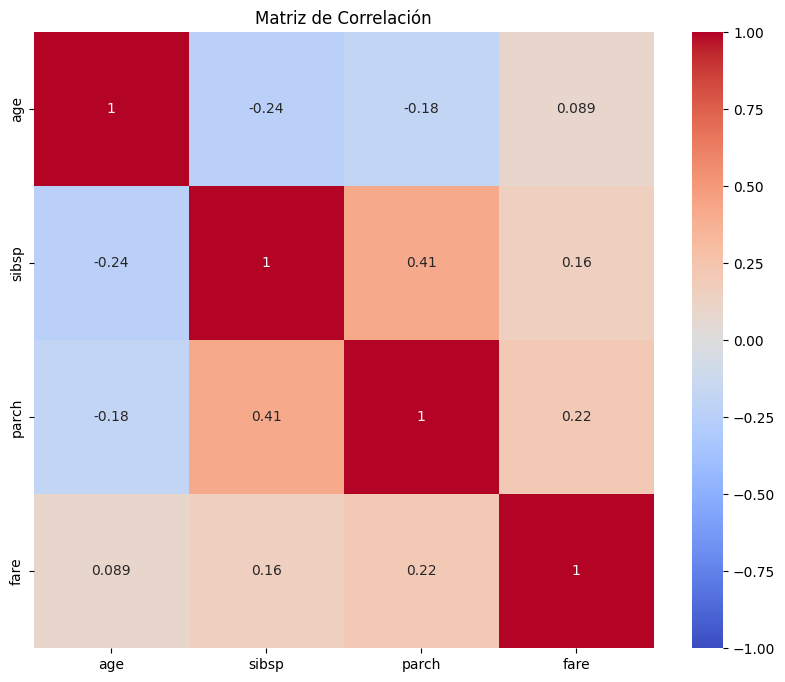

In [ ]:
corr_matriz = df[num].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

### PCA: Componenetes Principales
Es una técnica de reducción de dimensionalidad por lo cual se aplico para explorar y visualizar el conjunto de datos.

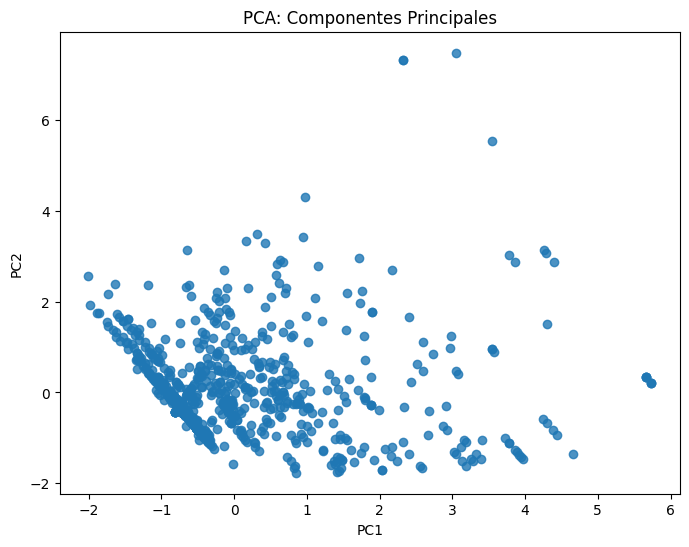

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num])

pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['p1', 'p2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df.p1, pca_df.p2, alpha=0.8)
plt.title('PCA: Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.grid(True)
plt.show()

### Imbalance Ratio (IR)
 La clase cero representa a los pasajeros que no sobrevivieron.

1. ¿Las clases de la variable objetivo estan balanceadas? No
2. ¿Cómo puedo saberlo? El IR=1.6 > 1.5

**************Balance de clases**************
Clases en el dataset: [0 1]
Numero de patrones en clase 0: 549
Numero de patrones en clase 1: 342
Imbalance Ratio: 1.61 > 1.5
**********************************************


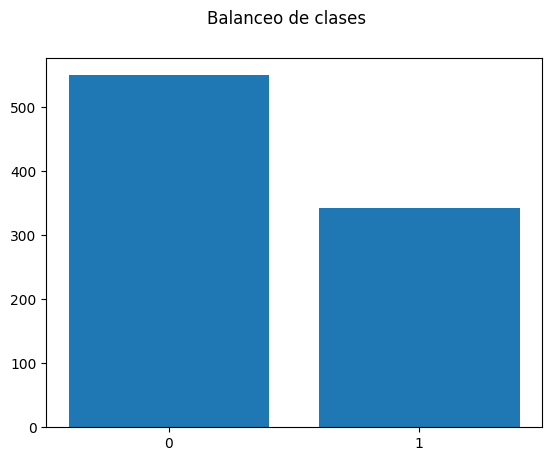

In [ ]:
y_ = df[y]
print('**************Balance de clases**************')
print(f"Clases en el dataset: {y_.unique()}")
print(f"Numero de patrones en clase 0: {np.sum(y_ == 0)}")
print(f"Numero de patrones en clase 1: {np.sum(y_ == 1)}")
print(f'Imbalance Ratio: {round(np.sum(y_ == 0)/np.sum(y_ == 1),2)} > 1.5')
print('**********************************************')

fig,ax = plt.subplots()
fig.suptitle('Balanceo de clases')
ax.bar(y_.unique(), height=[np.sum(y_ == 0), np.sum(y_ == 1)], tick_label=y_.unique())
plt.show()

In [ ]:
print(f'RI = {np.sum(y_ == 0)/ np.sum(y_ == 1)}')

RI = 1.605263157894737


### Visualización de datos

#### Gráfico de Barras

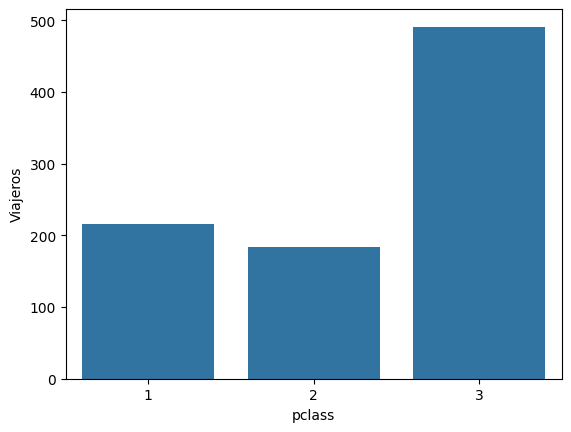

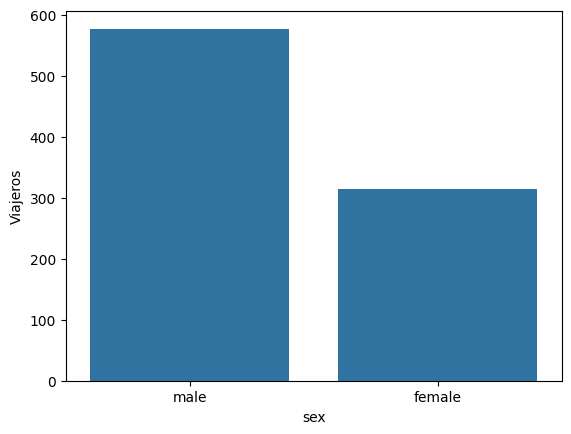

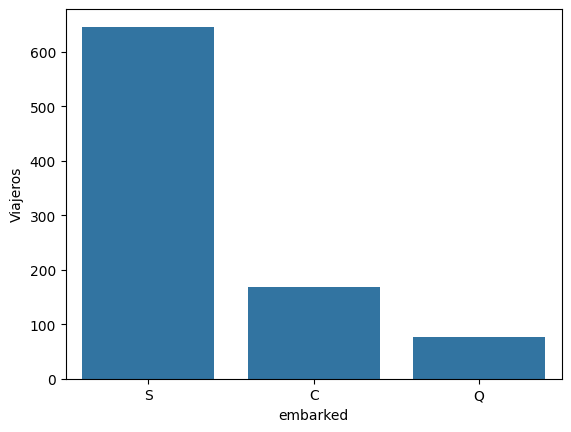

In [ ]:
for var in cat:
    sns.countplot(x=var, data=df)
    #plt.title(var)
    plt.ylabel('Viajeros')
    plt.show()

#### Gráfica de barras apiladas


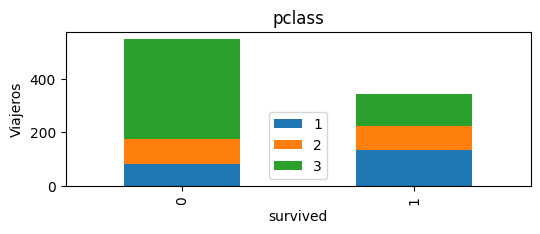

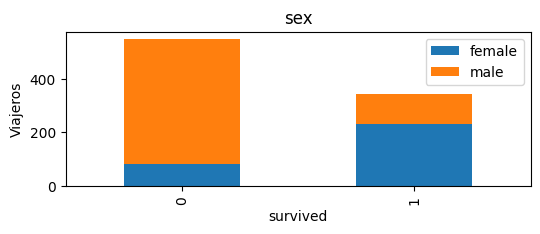

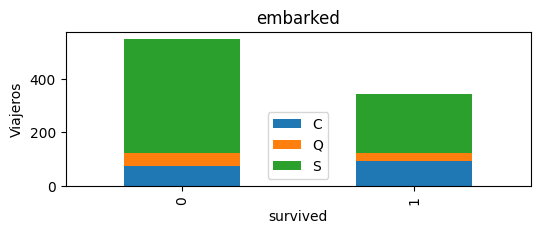

In [ ]:
for var in cat:
    df_plot= df[[y,var]].pivot_table(index=y,columns=var,aggfunc={var:'count'})
    df_plot.columns = [col[1] for col in df_plot.columns]

    ax = df_plot.plot(kind='bar', stacked=True, figsize=(6, 2))
    plt.title(var)
    plt.ylabel('Viajeros')
    plt.show()


#### Histogramas


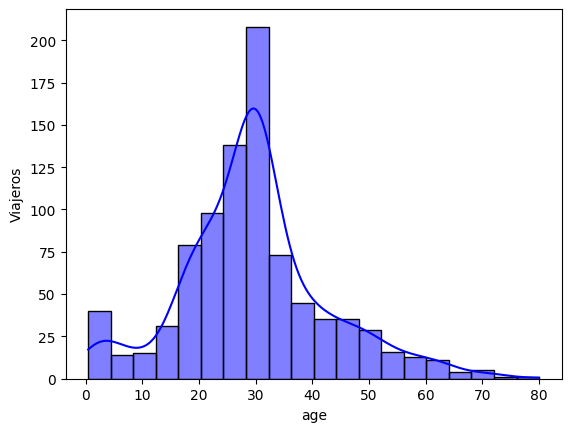

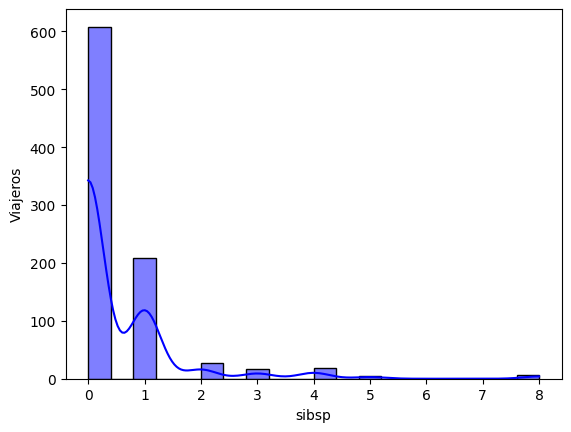

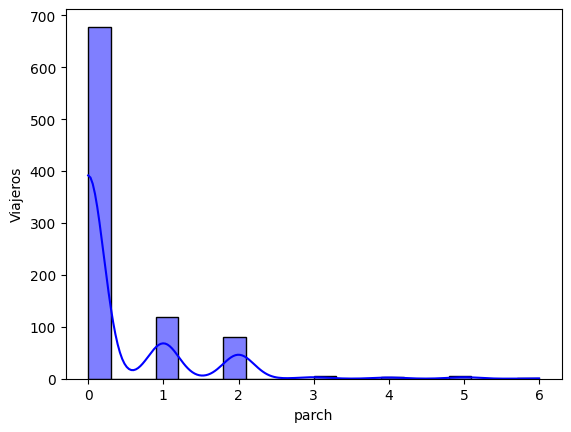

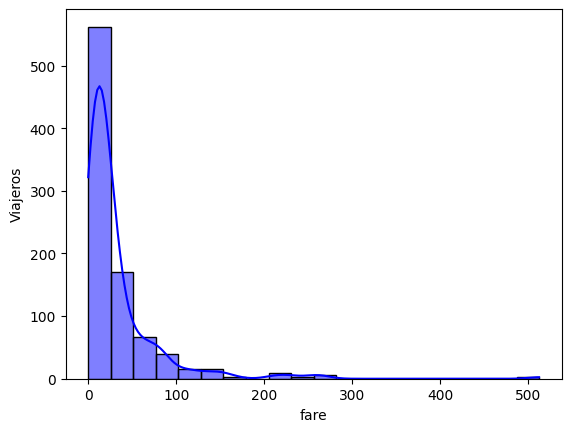

In [ ]:
for var in num:
    sns.histplot(df[var], kde=True, bins=20, color='blue')
    #plt.title(var)
    plt.ylabel('Viajeros')
    plt.show()

#### Diagramas de caja

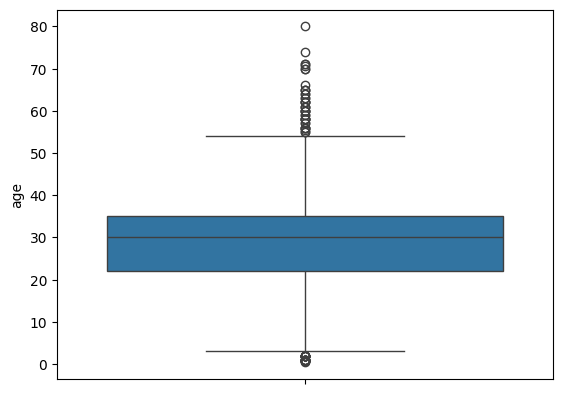

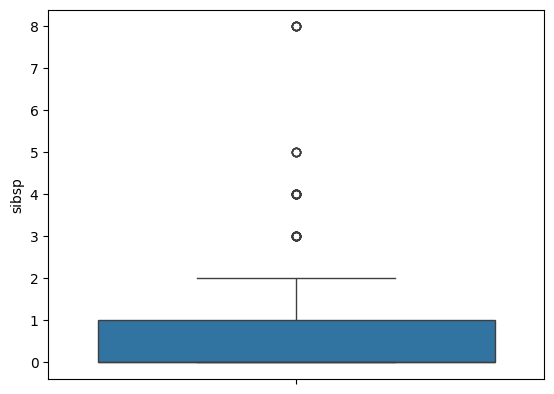

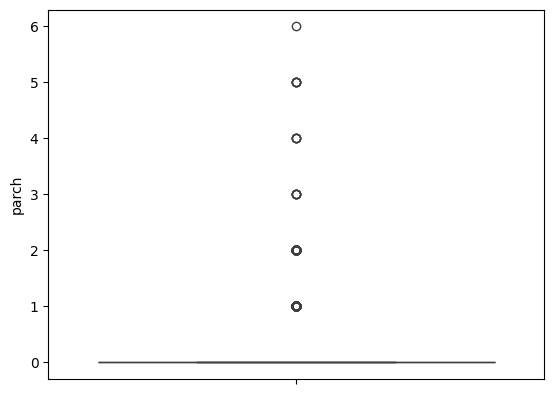

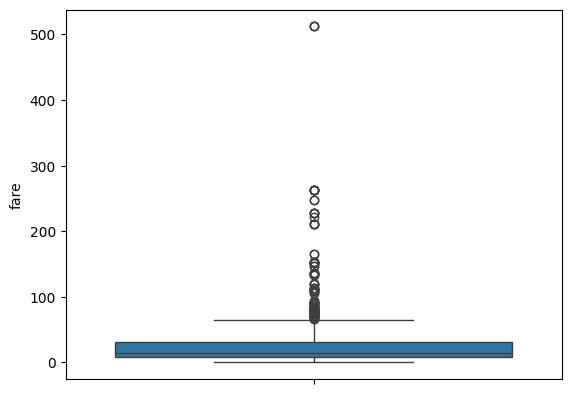

In [ ]:
for var in num:
    sns.boxplot(y=df[var])
    plt.show()

<Axes: xlabel='sex', ylabel='age'>

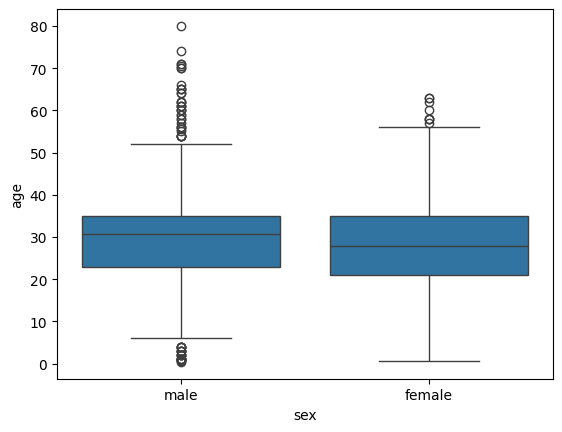

In [ ]:
sns.boxplot(x='sex', y='age', data=df)

#### Gráfico de Dispersión


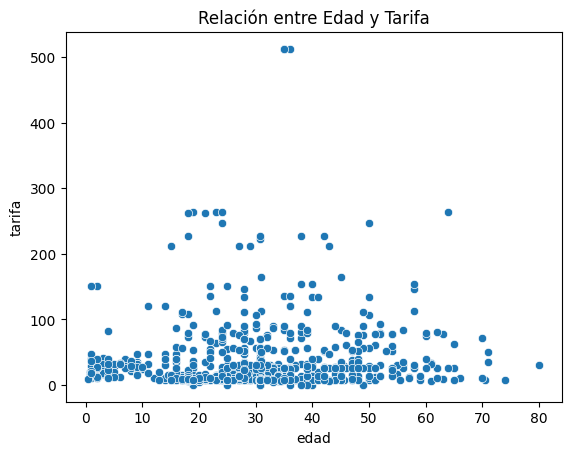

In [ ]:
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('edad')
plt.ylabel('tarifa')
plt.show()

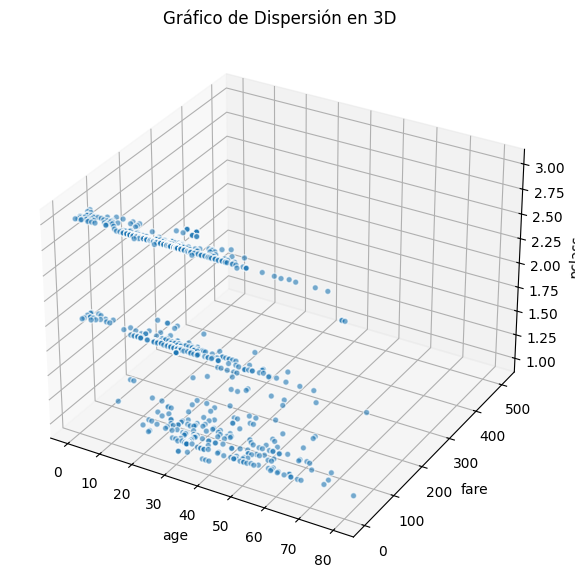

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.age, df.fare, df.pclass, alpha=0.6, edgecolors='w')
ax.set_title('Gráfico de Dispersión en 3D')
ax.set_xlabel('age')
ax.set_ylabel('fare')
ax.set_zlabel('pclass')

plt.show()

## Modelo

In [ ]:
cat

['pclass', 'sex', 'embarked']

In [ ]:
# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['sex', 'embarked'], dtype=int) #drop_first=True

In [ ]:
df

,age,survived,pclass,sibsp,fare,parch,ticketprefix_c,ticketprefix_ca,ticketprefix_f,ticketprefix_fa,...,title_military,title_miss,title_mr,title_mrs,title_royalty,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,22.000000,0,3,1,7.2500,0,False,False,False,False,...,False,False,True,False,False,0,1,0,0,1
1,38.000000,1,1,1,71.2833,0,False,False,False,False,...,False,False,False,True,False,1,0,1,0,0
2,26.000000,1,3,0,7.9250,0,False,False,False,False,...,False,True,False,False,False,1,0,0,0,1
3,35.000000,1,1,1,53.1000,0,False,False,False,False,...,False,False,False,True,False,1,0,0,0,1
4,35.000000,0,3,0,8.0500,0,False,False,False,False,...,False,False,True,False,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,2,0,13.0000,0,False,False,False,False,...,True,False,False,False,False,0,1,0,0,1
887,19.000000,1,1,0,30.0000,0,False,False,False,False,...,False,True,False,False,False,1,0,0,0,1
888,27.915709,0,3,1,23.4500,2,False,False,False,False,...,False,True,False,False,False,1,0,0,0,1
889,26.000000,1,1,0,30.0000,0,False,False,False,False,...,False,False,True,False,False,0,1,1,0,0


## Escalar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=[y]))
#X_scaled = df.drop(columns=[y])

### Entrenar distintos modelos

_**(cambiado)**_

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# SMOTE para balancear las clases
smote = SMOTE(random_state=SEED)
X_resampled, y_resampled = smote.fit_resample(X_scaled, df[y])

In [ ]:
# Dividir los datos resampleados (SMOTE) en los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=SEED, stratify=y_resampled)
print(f"Tamaño de X_train: {X_train.shape[0]}")
print(f"Tamaño de y_train: {y_train.shape[0]}")
print(f"Tamaño de X_test: {X_test.shape[0]}")
print(f"Tamaño de y_test: {y_test.shape[0]}")

Tamaño de X_train: 988
Tamaño de y_train: 988
Tamaño de X_test: 110
Tamaño de y_test: 110


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Validación
Utilizar Hold-out y k-fold. En caso de que el dataset sea desbalanceado, debemos
de asegurar, en la medida de lo posible, que nuestras particiones respetarán la
distribución de nuestros datos, el término `stratified` en `sklearn` hace
referencia a este proceso.

- [hold-out](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Si el dataset es desbalanceado, deberán utilizar el
parámetro `stratify`.
- [k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
- [Stratified k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

**Nota**: Recuerda que hold-out se ejecuta una sola vez, mientras que kfold se
ejecuta k número de veces (requieres un ciclo `for` para ello)

## Entrenamiento del modelo

In [ ]:
acc_holdout = []

for model in [KNeighborsClassifier(n_neighbors=5), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Metricas de desempeño
    model_name = str(model).split('(')[0]
    acc_holdout.append({'modelo':model_name,'accuracy':accuracy_score(y_test, y_pred),'f1_score':f1_score(y_test, y_pred)})


In [ ]:
acc_holdout_df = pd.DataFrame(acc_holdout)
acc_holdout_df

,modelo,accuracy,f1_score
0,KNeighborsClassifier,0.863636,0.862385
1,LogisticRegression,0.845455,0.844037
2,DecisionTreeClassifier,0.827273,0.825688
3,RandomForestClassifier,0.827273,0.825688


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier(random_state=SEED)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Profundidad del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy'] # Criterio para la división
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=73), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
print(results[['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.795544
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.795544
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.795544
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.795544
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...         0.795544
..                                                ...              ...
85  {'criterion': 'entropy', 'max_depth': None, 'm...         0.794519
86  {'criterion': 'entropy', 'max_depth': None, 'm...         0.806702
87  {'criterion': 'entropy', 'max_depth': None, 'm...         0.799600
88  {'criterion': 'entropy', 'max_depth': None, 'm...         0.799600
89  {'criterion': 'entropy', 'max_depth': None, 'm...         0.797580

[90 rows x 2 columns]


In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print("Mejores parámetros:", best_params, "\n", best_model)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5} 
 DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=73)


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8181818181818182, 0.8076923076923077)

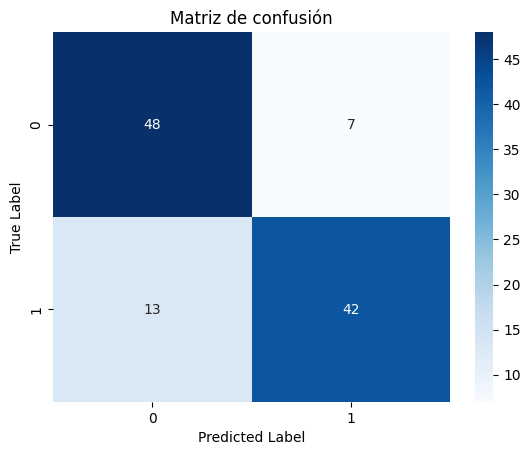

In [ ]:
from sklearn.metrics import confusion_matrix

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
from sklearn import tree

In [ ]:
cols = list(df.columns)
cols.remove(y)

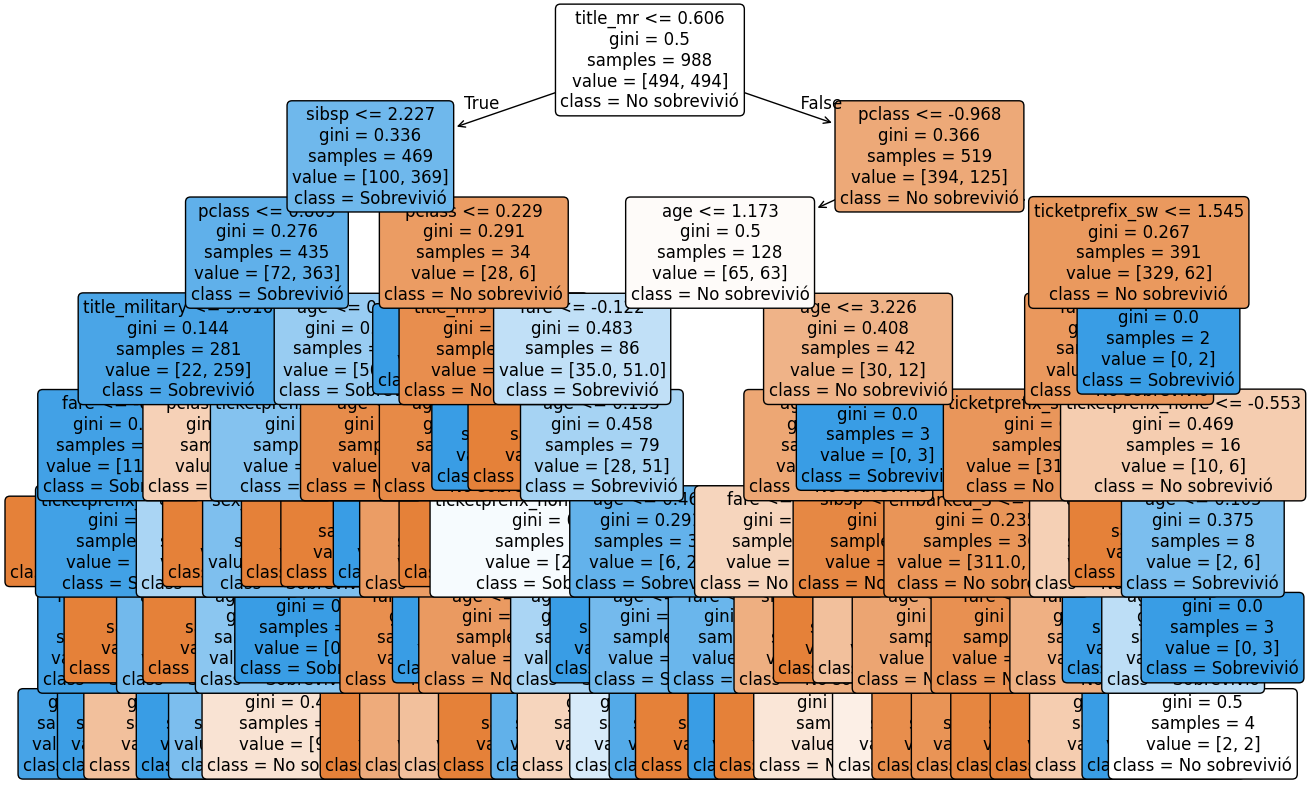

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_model, filled=True, feature_names=cols, class_names=['No sobrevivió', 'Sobrevivió'], rounded=True, fontsize=12)
plt.show()